In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import os

In [11]:
directorio_actual=os.getcwd()
entrena = directorio_actual + '\entrenamiento_red1'
test = directorio_actual + '//validacion_red1'

batch_size = 64
img_height = 224
img_width = 224

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'  # Rellenar píxeles faltantes
)

validation_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    entrena,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical' 
)

validation_generator = validation_datagen.flow_from_directory(
    test,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 87756 images belonging to 101 classes.
Found 21668 images belonging to 101 classes.


In [13]:
#@title Red neuronal 2
model = models.Sequential([
    # Capa convolucional 1
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(img_height, img_width, 3),padding='same'),
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(img_height, img_width, 3),padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2),padding='valid',strides=2),


    # Capa convolucional 2
    layers.Conv2D(32, (3, 3), activation='relu',padding='same'),
    layers.Conv2D(32, (3, 3), activation='relu',padding='same'),
    
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2),padding='valid',strides=2),

    # Capa convolucional 3
    layers.Conv2D(64, (3, 3), activation='relu',padding='same'),
    layers.Conv2D(64, (3, 3), activation='relu',padding='same'),
    layers.Conv2D(64, (3, 3), activation='relu',padding='same'),


    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2),padding='valid',strides=2),

    # Capa convolucional 3
    layers.Conv2D(128, (3, 3), activation='relu',padding='same'),
    layers.Conv2D(128, (3, 3), activation='relu',padding='same'),
    layers.Conv2D(128, (3, 3), activation='relu',padding='same'),

    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2),padding='valid',strides=2),


    layers.Flatten(),

    layers.Dropout(0.5),


    # Capa densa 1
    layers.Dense(4096, activation='relu'),
    # Capa de salida
    layers.Dense(train_generator.num_classes, activation='softmax')
])
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
guardado = tf.keras.callbacks.ModelCheckpoint(
    'SEGUNDO_INTENTO.h5',     
    monitor='val_accuracy',   
    verbose=1,                
    save_best_only=True,      
    mode='max',                 
)
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=5,  # Número de épocas sin mejora antes de detener
    restore_best_weights=True
)
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_50 (Conv2D)          (None, 224, 224, 16)      448       
                                                                 
 conv2d_51 (Conv2D)          (None, 224, 224, 16)      2320      
                                                                 
 batch_normalization_20 (Bat  (None, 224, 224, 16)     64        
 chNormalization)                                                
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 112, 112, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_52 (Conv2D)          (None, 112, 112, 32)      4640      
                                                                 
 conv2d_53 (Conv2D)          (None, 112, 112, 32)     

In [14]:
epochs = 70
with tf.device('/GPU:0'):
    history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // batch_size,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples // batch_size,
        callbacks=[guardado]
    )


Epoch 1/70
1371/1371 [==============================] - ETA: 0s - loss: 4.5923 - accuracy: 0.0545
Epoch 1: val_accuracy improved from -inf to 0.06370, saving model to SEGUNDO_INTENTO.h5
1371/1371 [==============================] - 637s 464ms/step - loss: 4.5923 - accuracy: 0.0545 - val_loss: 4.6778 - val_accuracy: 0.0637
Epoch 2/70
1371/1371 [==============================] - ETA: 0s - loss: 3.9876 - accuracy: 0.0953
Epoch 2: val_accuracy improved from 0.06370 to 0.08561, saving model to SEGUNDO_INTENTO.h5
1371/1371 [==============================] - 634s 462ms/step - loss: 3.9876 - accuracy: 0.0953 - val_loss: 4.1715 - val_accuracy: 0.0856
Epoch 3/70
1371/1371 [==============================] - ETA: 0s - loss: 3.7592 - accuracy: 0.1299
Epoch 3: val_accuracy improved from 0.08561 to 0.11293, saving model to SEGUNDO_INTENTO.h5
1371/1371 [==============================] - 636s 464ms/step - loss: 3.7592 - accuracy: 0.1299 - val_loss: 4.1238 - val_accuracy: 0.1129
Epoch 4/70
1371/1371 [===

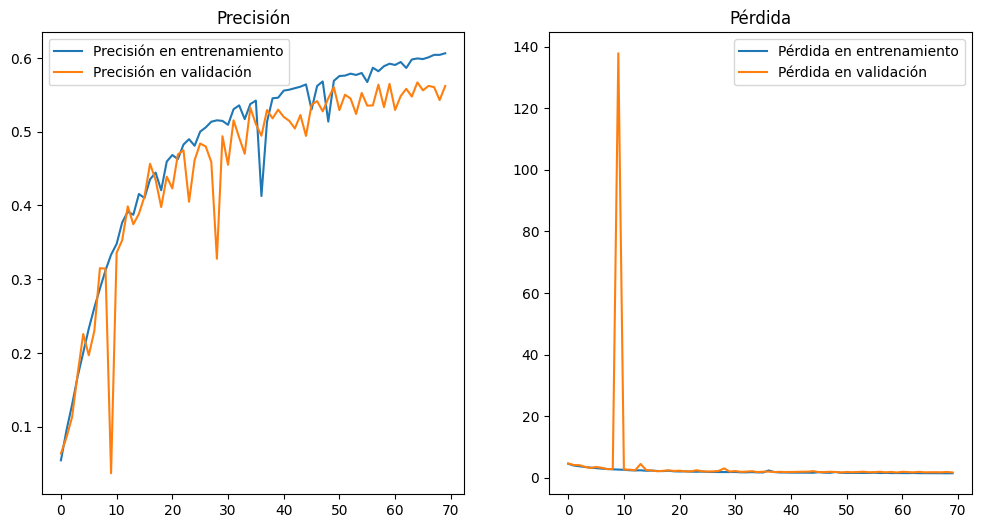

In [15]:
# Graficar precisión y pérdida
acc = history.history['accuracy']
val_acc = history.history['val_accuracy'] 
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Precisión en entrenamiento')
plt.plot(epochs_range, val_acc, label='Precisión en validación')
plt.legend()
plt.title('Precisión')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Pérdida en entrenamiento')
plt.plot(epochs_range, val_loss, label='Pérdida en validación')
plt.legend()
plt.title('Pérdida')

plt.show()

In [ ]:
#Extraer imagenes
!unrar x /content/entrenamiento_red.rar /content/ 

Se truncaron las últimas líneas 5000 del resultado de transmisión.
Extracting  /content/entrenamiento_red/strawberry_shortcake/3905305.jpg      93%  OK 
Extracting  /content/entrenamiento_red/strawberry_shortcake/3908945.jpg      93%  OK 
Extracting  /content/entrenamiento_red/strawberry_shortcake/3916946.jpg      93%  OK 
Extracting  /content/entrenamiento_red/strawberry_shortcake/395227.jpg      93%  OK 
Extracting  /content/entrenamiento_red/strawberry_shortcake/39804.jpg      93%  OK 
Extracting  /content/entrenamiento_red/strawberry_shortcake/402691.jpg      93%  OK 
Extracting  /content/entrenamiento_red/strawberry_shortcake/417010.jpg      93%  OK 
Extracting  /content/entrenamiento_red/strawberry_shortcake/42096.jpg      93%  OK 
Extracting  /content/entrenamiento_red/strawberry_shortcake/42517.jpg      93%  OK 
Extracting  /content/entrenamiento_red/strawberry_shortcake/42651.jpg      93%

In [29]:
model.save('saved_model.pb')

INFO:tensorflow:Assets written to: saved_model.pb\assets


INFO:tensorflow:Assets written to: saved_model.pb\assets


In [16]:
import tensorflow as tf

# Cargar el modelo desde el archivo .h5
model = tf.keras.models.load_model('SEGUNDO_INTENTO.h5')

# Ahora puedes usar el modelo para hacer predicciones
#predictions = model.predict(X_new_data)